In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os
from IPython.display import Image as disImage
from PIL import Image
directory = "/content/drive/My Drive/SampleMoviePosters/"
for dirname, _, filenames in os.walk(directory):
    for file in filenames:
        os.path.join(dirname, file)

In [3]:
import glob
id_list = []
for filename in glob.iglob(f'{directory}/*'):
    f = filename.split('/')
    id_list.append(f[-1][:-4])

In [4]:
import numpy as np
shape = (268,182,3)
image_array = []
for each in id_list:
    img = Image.open('/content/drive/My Drive/SampleMoviePosters/'+each+'.jpg')
    image_array.append(np.array(img))

In [5]:
import csv
id_genre_dict = {}
title_dict = {}
with open("/content/drive/My Drive/MovieGenre.csv", newline='',encoding = "ISO-8859-1") as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        movie_id = row[0]
        gen = row[4]
        title = row[2]
        gen_split = gen.split('|')
        id_genre_dict.update({movie_id:gen_split})
        title_dict.update({movie_id:title})

In [6]:
genres = id_genre_dict.values()
genres = [item for sublist in genres for item in sublist]
genres = set(genres)
genres = list(genres)
genres.remove('')
genres.remove('Genre')
genres.sort()

In [7]:
arr_y = []
for each in id_list:
    y_each = np.zeros(len(genres))
    gens = id_genre_dict[each]
    for i in gens:
        y_each[genres.index(i)] = 1
    arr_y.append(y_each)

In [8]:
img = np.asarray(image_array)
np.save('X.npy',img)
y = np.asarray(arr_y)
np.save('Y',y)

In [12]:
from keras.models import Sequential
model = Sequential()
from keras.layers import Dense, Conv2D, Flatten
model.add(Conv2D(64, kernel_size = 3, activation = 'relu', input_shape = (268,182,3)))
model.add(Conv2D(32, kernel_size = 3, activation = 'relu'))
model.add(Flatten())
model.add(Dense(28, activation = 'sigmoid'))
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy'])

In [17]:
history = model.fit(img, y, epochs = 7, validation_split = 0.1, batch_size = 32)

Epoch 1/7
29/29 [==============================] - 3s 100ms/step - loss: 0.0071 - binary_accuracy: 0.9997 - val_loss: 0.3771 - val_binary_accuracy: 0.9236
Epoch 2/7
29/29 [==============================] - 3s 98ms/step - loss: 0.0228 - binary_accuracy: 0.9992 - val_loss: 0.4317 - val_binary_accuracy: 0.9175
Epoch 3/7
29/29 [==============================] - 3s 98ms/step - loss: 0.0143 - binary_accuracy: 0.9995 - val_loss: 1.1632 - val_binary_accuracy: 0.9275
Epoch 4/7
29/29 [==============================] - 3s 98ms/step - loss: 0.0158 - binary_accuracy: 0.9996 - val_loss: 0.7293 - val_binary_accuracy: 0.9239
Epoch 5/7
29/29 [==============================] - 3s 97ms/step - loss: 0.0082 - binary_accuracy: 0.9996 - val_loss: 1.0548 - val_binary_accuracy: 0.9268
Epoch 6/7
29/29 [==============================] - 3s 98ms/step - loss: 0.0037 - binary_accuracy: 0.9998 - val_loss: 1.5846 - val_binary_accuracy: 0.9321
Epoch 7/7
29/29 [==============================] - 3s 98ms/step - loss: 0.0

In [14]:
score = 0
for img_no in range(len(image_array)):

    test_y = image_array[img_no]

    ty = np.reshape(test_y, (1,268,182,3))

    pred_genre = model.predict(ty, verbose = 0)

    best_pred_genre = genres[np.argmax(pred_genre)]
    correct_genres = id_genre_dict[id_list[img_no]]
    if best_pred_genre in correct_genres:
        score +=1
print('accuracy = ', (score/len(image_array))*100, '%')

accuracy =  96.08826479438315 %


Hogaraka ni ayume (1930)
1/1 [==============================] - 0s 16ms/step
Predicted: 	 Comedy
Correct answers:  Crime Drama Romance


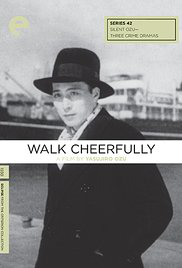

In [ ]:
img_no = np.random.randint(low = 0, high = 997)
print(title_dict[id_list[img_no]])
test_y = image_array[img_no]
test_y.shape
ty = np.reshape(test_y, (1,268,182,3))
pred_genre = model.predict(ty)
print("Predicted: \t",genres[np.argmax(pred_genre)])
print("Correct answers: ",*id_genre_dict[id_list[img_no]])
Image.fromarray(test_y)

Jaws (1975)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0.]
1/1 [==============================] - 0s 19ms/step
Predicted: 	 Drama
Correct answers: Adventure, Thriller


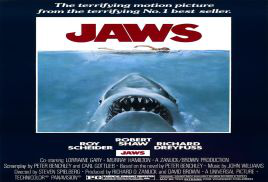

In [18]:
shape = (268,182,3)
shape2 = (1,268,182,3)

print ("Jaws (1975)")
j_img_y = Image.open('/content/drive/My Drive/Jaws-Movie-Poster-Imdb-Resized.jpg')
jaws_image = np.asarray(j_img_y) * 1.0
jaws_image = jaws_image.astype(np.uint8)
jaws_image.shape
jaws_image_y = jaws_image.reshape(shape2)

j_gen = np.zeros(len(genres))
j_gen[2] = 1.0
j_gen[25] = 1.0
print(j_gen)

j_pred = model.predict(jaws_image_y)
print("Predicted: \t", genres[np.argmax(j_pred)])
print("Correct answers: Adventure, Thriller")
Image.fromarray(jaws_image)